In [1]:
#!pip install dask
#!pip install dask[complete]
#!pip install dask_ml
#!pip install dask distributed --upgrade
#!pip install dask[dataframe] --upgrade
#!pip install dask[bag] --upgrade
#!pip install dask[delayed] --upgrade
#!pip install dask[array] --upgrade

#!pip install scikit-learn
#!pip install sklearn-time
#!pip install snapml  (if I want snapml install dask first)
#!pip install matplotlib
#!pip install pandas
#!pip install numpy

In [52]:
from __future__ import print_function
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, classification_report, confusion_matrix, f1_score, jaccard_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import  PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Task1
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
df = pd.read_csv(URL)

In [4]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [5]:
df.dtypes

model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
price             int64
dtype: object

In [6]:
df.replace('?', np.NaN, inplace=True)

In [7]:
#Task2
df.isnull().sum()

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64

In [8]:
avg_tax = round(df['tax'].mean(axis=0), 0)
df['tax'] = df['tax'].replace(np.NaN, avg_tax)

In [9]:
df.shape

(17966, 9)

In [10]:
df[df.duplicated(keep='first')]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
159,Focus,2016,Manual,30923,Diesel,0.0,74.3,1.5,10995
312,Focus,2019,Manual,7000,Petrol,145.0,58.9,1.0,14998
349,Focus,2019,Manual,7000,Petrol,145.0,58.9,1.0,14998
510,EcoSport,2019,Manual,5636,Diesel,145.0,68.9,1.5,15489
512,Grand Tourneo Connect,2019,Manual,3500,Diesel,145.0,61.4,1.5,19999
...,...,...,...,...,...,...,...,...,...
14556,Mondeo,2015,Manual,138000,Diesel,20.0,68.9,2.0,6793
15121,Kuga,2017,Manual,24877,Diesel,30.0,64.2,1.5,14999
15127,EcoSport,2019,Automatic,433,Petrol,150.0,45.6,1.0,16799
15685,KA,2008,Manual,63000,Petrol,160.0,45.6,1.3,1795


Thus, we expect after the removal of duplicates the total rows to be: 17966-154=17812

In [12]:
df = df.drop_duplicates(keep='first')
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17962,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17963,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17964,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


In [13]:
#remove outlier (probably wrong record)
df.drop(df[df['year'] == 2060].index, inplace=True)

In [14]:
df.reset_index(inplace=True, drop=True)

In [15]:
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17806,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17807,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17808,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17809,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


In [47]:
df.to_csv('auto_sales.csv')

data augmenting through Mostly.AI

In [ ]:
#Task3(optional)
from google.colab import files


uploaded = files.upload()


In [ ]:
df1 = pd.read_csv('auto_sales (1).csv')

In [ ]:
df1

In [ ]:
df = pd.concat([df, df1], axis=0)

In [ ]:
df.to_csv('auto_data_augm.csv')

In [ ]:
df.isnull().sum()

In [ ]:
df[df.duplicated(keep='first')]

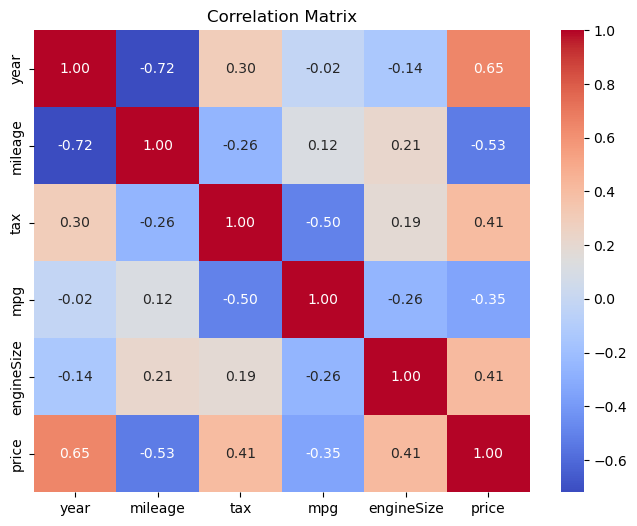

In [32]:
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [30]:
df_dummies = pd.get_dummies(df, drop_first=True, dtype=int)

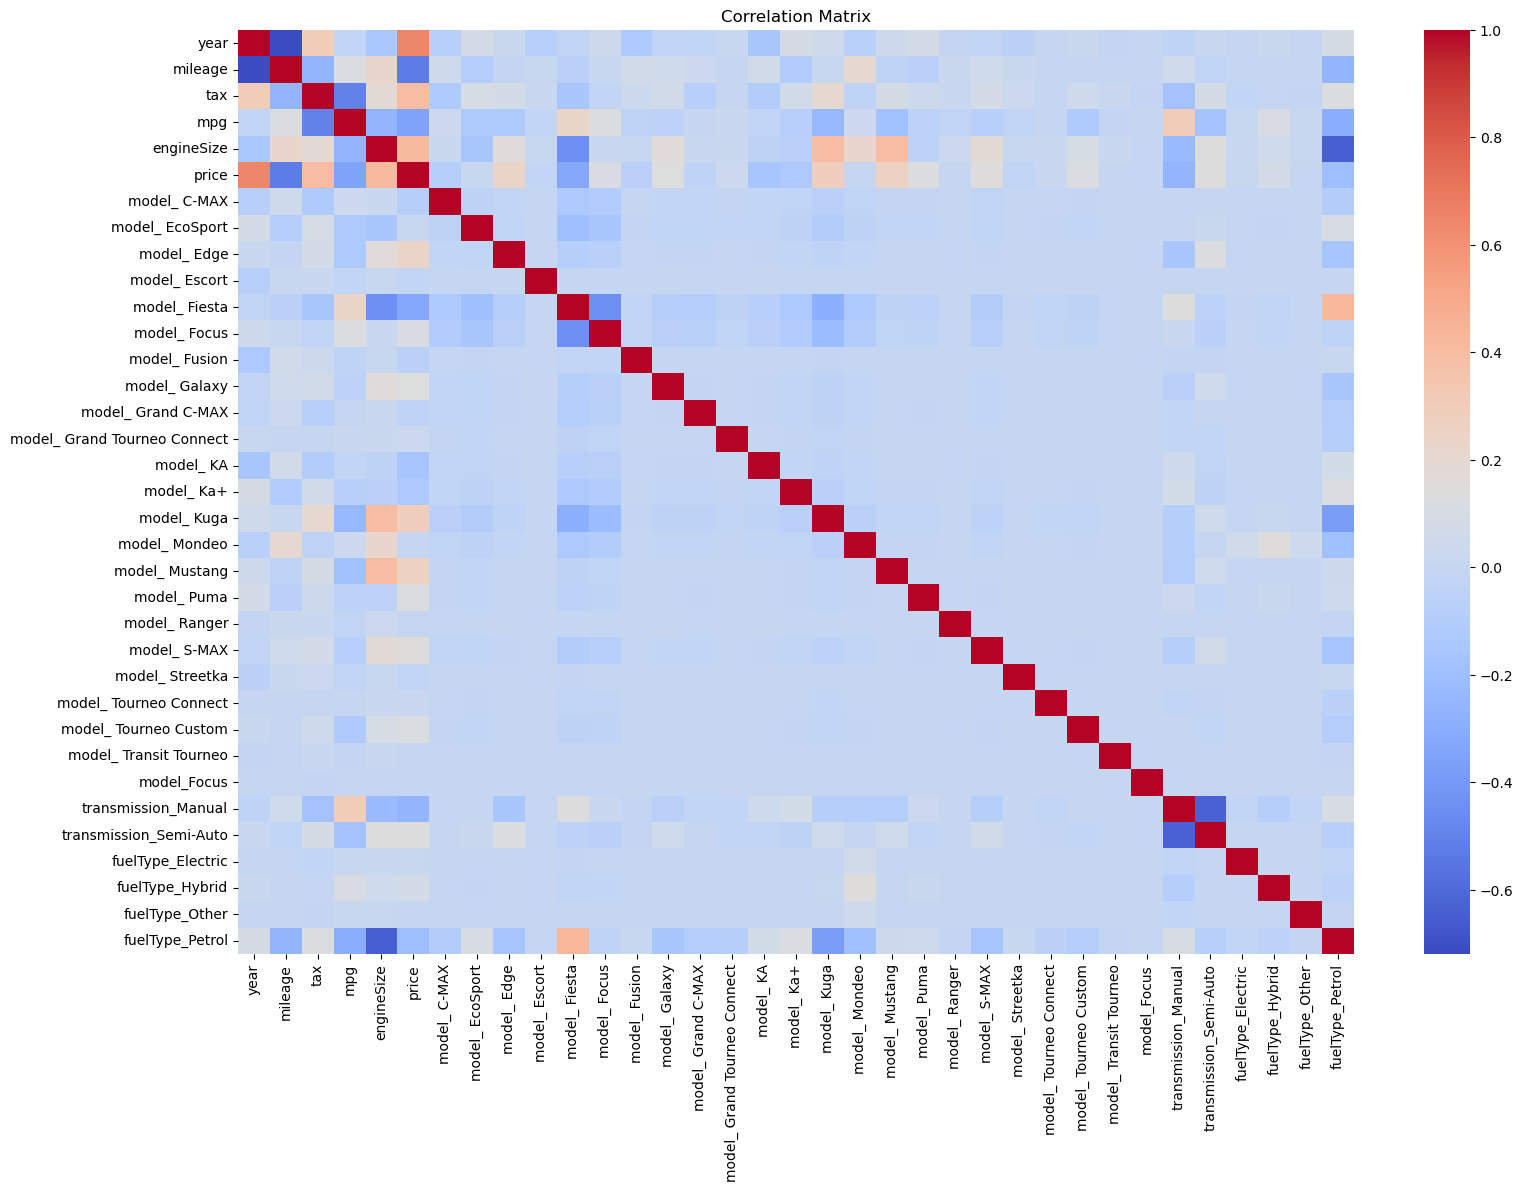

In [36]:
corr_matrix = df_dummies.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [37]:
#Task4
corr_matrix['price'].drop('price').sort_values(ascending=False, key=abs).head(5)

year          0.645236
mileage      -0.530433
engineSize    0.411476
tax           0.406113
mpg          -0.346401
Name: price, dtype: float64

In [38]:
#Task5
df['fuelType'].value_counts()

fuelType
Petrol      12080
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

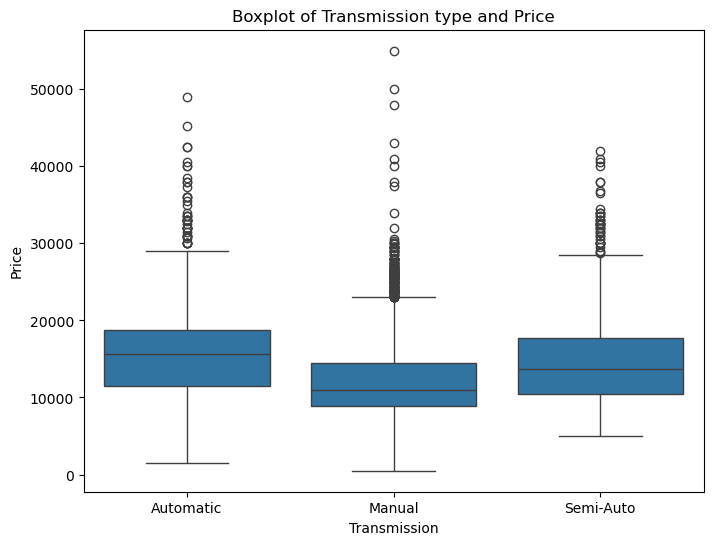

In [39]:
#Task6
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Boxplot of Transmission type and Price')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

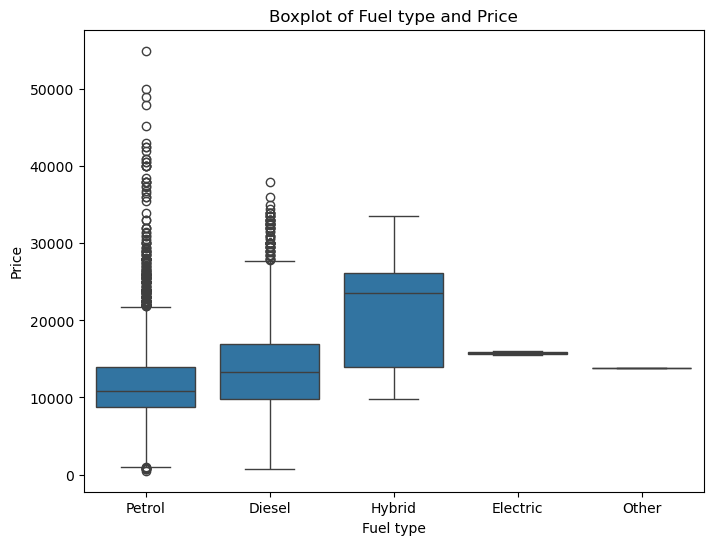

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Boxplot of Fuel type and Price')
plt.xlabel('Fuel type')
plt.ylabel('Price')
plt.show()

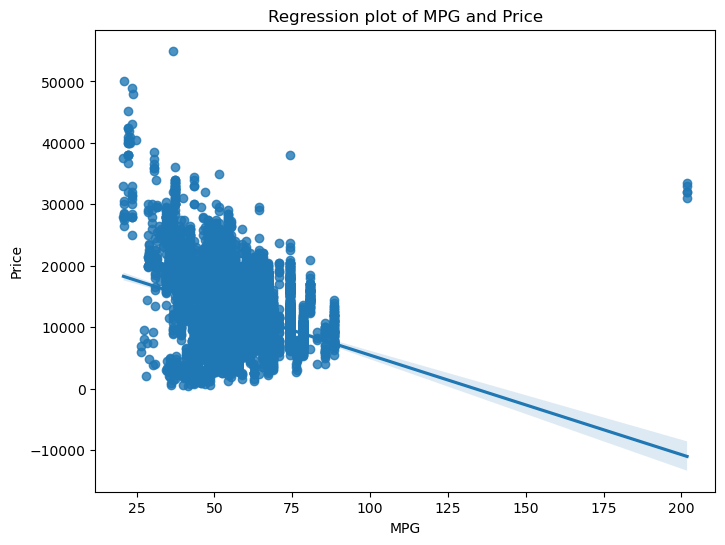

In [41]:
#Task7
plt.figure(figsize=(8, 6))
sns.regplot(x='mpg', y='price', data=df)
plt.title('Regression plot of MPG and Price')
plt.xlabel('MPG')
plt.ylabel('Price')
plt.show()

In [32]:
#Drop outliers
df.drop(df[df['mpg'] > 100].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17801,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17802,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17803,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17804,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


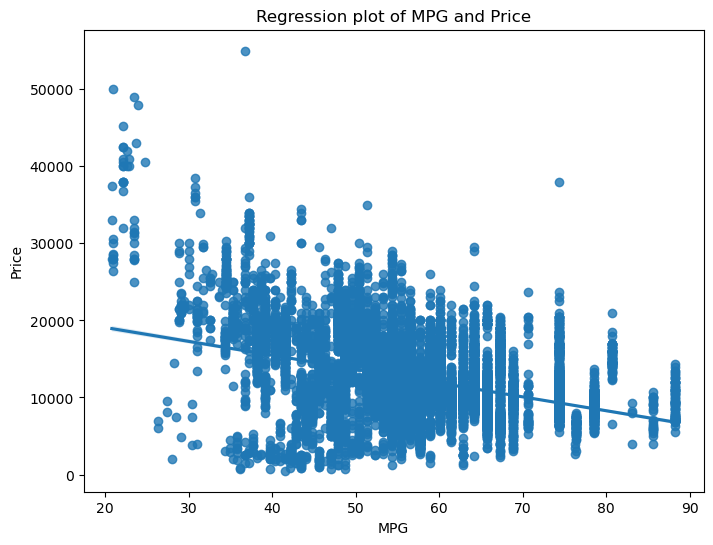

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot(x='mpg', y='price', data=df)
plt.title('Regression plot of MPG and Price')
plt.xlabel('MPG')
plt.ylabel('Price')
plt.show()

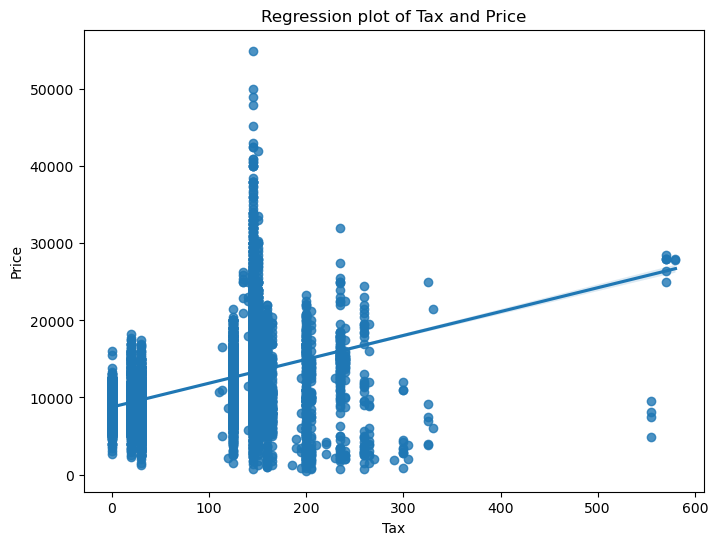

In [35]:
plt.figure(figsize=(8, 6))
sns.regplot(x='tax', y='price', data=df)
plt.title('Regression plot of Tax and Price')
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show()

In [34]:
df.drop(df[df['tax'] > 350].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17789,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17790,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17791,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17792,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


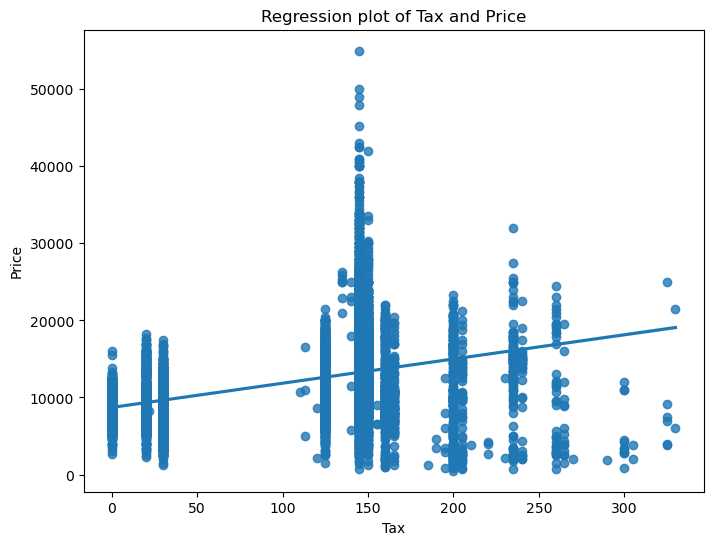

In [38]:
plt.figure(figsize=(8, 6))
sns.regplot(x='tax', y='price', data=df)
plt.title('Regression plot of Tax and Price')
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show()

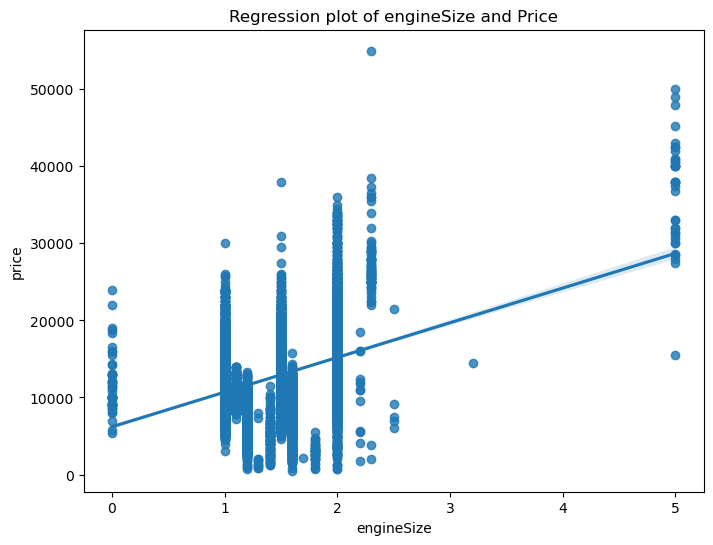

In [39]:
plt.figure(figsize=(8, 6))
sns.regplot(x='engineSize', y='price', data=df)
plt.title('Regression plot of engineSize and Price')
plt.xlabel('engineSize')
plt.ylabel('price')
plt.show()

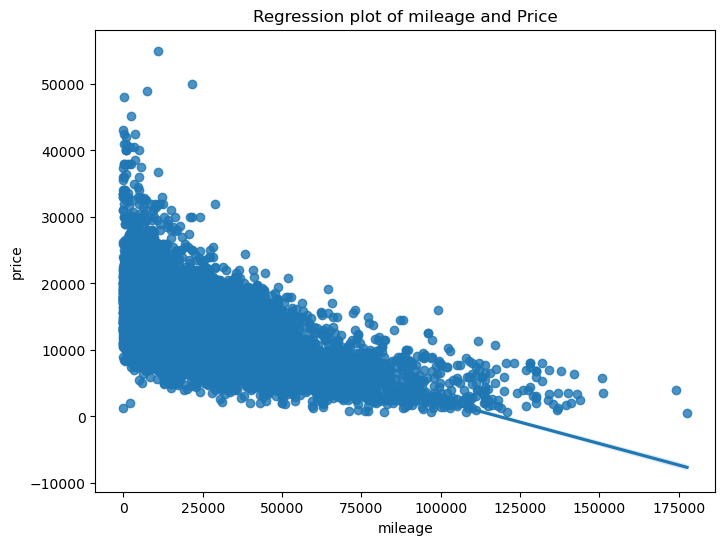

In [42]:
plt.figure(figsize=(8, 6))
sns.regplot(x='mileage', y='price', data=df)
plt.title('Regression plot of mileage and Price')
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

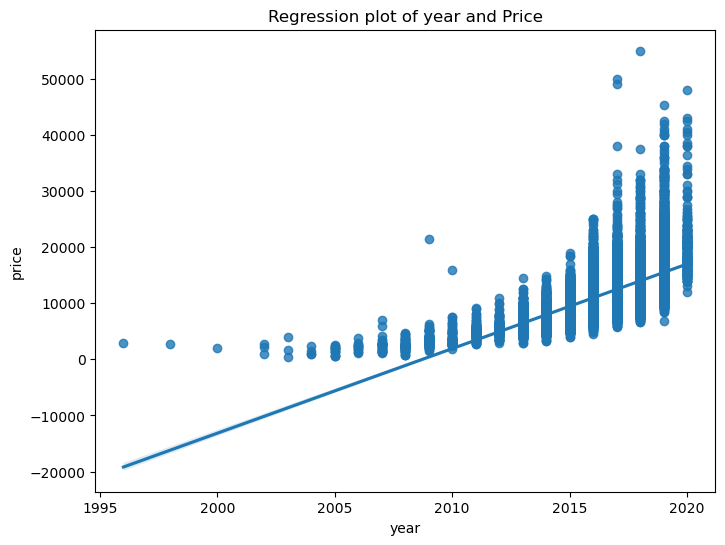

In [43]:
plt.figure(figsize=(8, 6))
sns.regplot(x='year', y='price', data=df)
plt.title('Regression plot of year and Price')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

In [50]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit with Matplotlib for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [51]:
#Linear Regression
X = df[['mpg']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 18955376.38 
R^2 = 0.14


[-8.92183521e-07  3.23871457e-04 -4.86018953e-02  3.89761670e+00
 -1.80204312e+02  4.82543840e+03 -7.07937212e+04  4.78816544e+05]
            7             6          5         4         3        2
-8.922e-07 x + 0.0003239 x - 0.0486 x + 3.898 x - 180.2 x + 4825 x - 7.079e+04 x + 4.788e+05
MSE = 17079976.38 
R^2 = 0.23


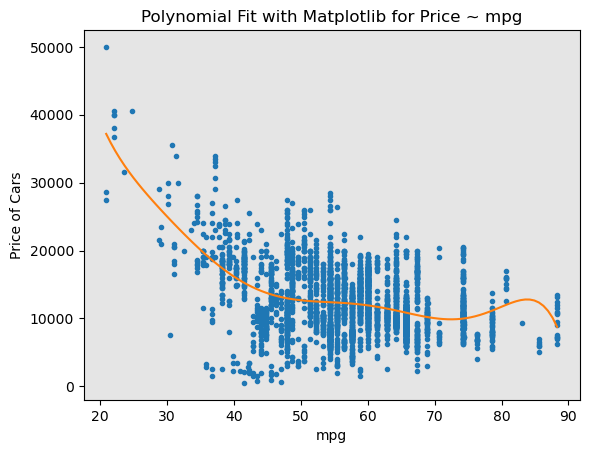

In [52]:
#Polynomial Regression mpg
X = df['mpg']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f = np.polyfit(X_train, y_train, 7)
print(f)
p = np.poly1d(f)
print(p)
yhat = p(X_test.values)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')
PlotPolly(p, X_test, y_test, 'mpg')

[-1.28653004e-11  3.16678947e-06 -2.98001725e-01  1.69865870e+04]
            3             2
-1.287e-11 x + 3.167e-06 x - 0.298 x + 1.699e+04
MSE = 15201862.39 
R^2 = 0.31


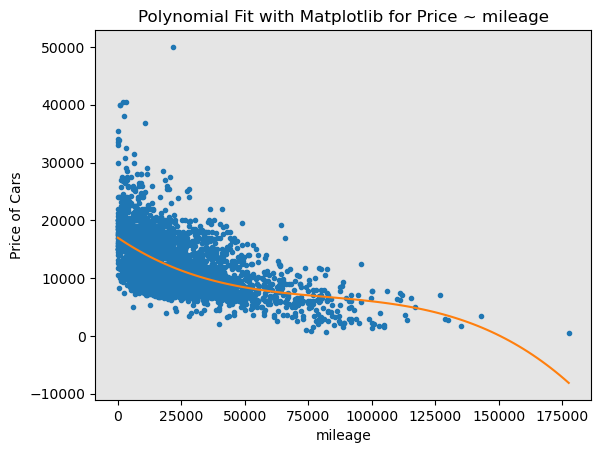

In [53]:
#Polynomial Regression mileage
X = df['mileage']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f = np.polyfit(X_train, y_train, 3)
print(f)
p = np.poly1d(f)
print(p)
yhat = p(X_test.values)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')
PlotPolly(p, X_test, y_test, 'mileage')

[ 6.16338920e+00 -3.71168728e+04  7.45080942e+07 -4.98558112e+10]
       3             2
6.163 x - 3.712e+04 x + 7.451e+07 x - 4.986e+10
MSE = 11907381.61 
R^2 = 0.46


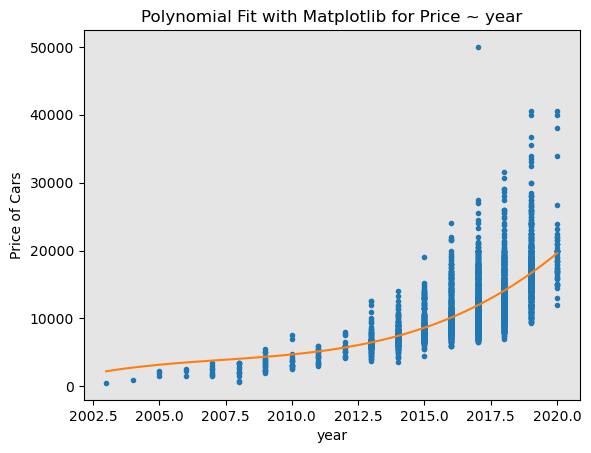

In [54]:
#Polynomial Regression year
X = df['year']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f = np.polyfit(X_train, y_train, 3)
print(f)
p = np.poly1d(f)
print(p)
yhat = p(X_test.values)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')
PlotPolly(p, X_test, y_test, 'year')

[-1.67308722e-03  4.44557188e-01  4.59741708e+00  8.62292647e+03]
           3          2
-0.001673 x + 0.4446 x + 4.597 x + 8623
MSE = 17824927.21 
R^2 = 0.20


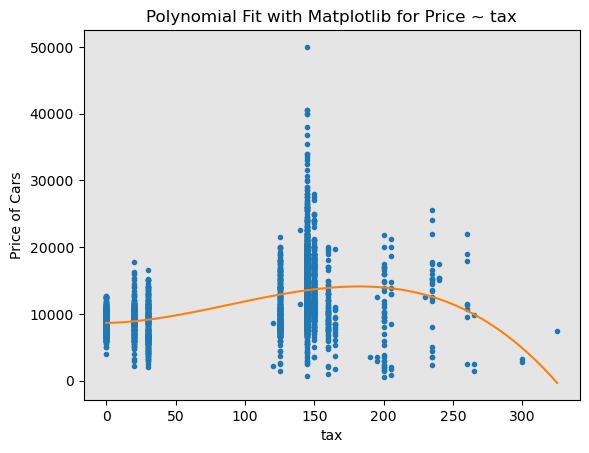

In [55]:
#Polynomial Regression tax
X = df['tax']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f = np.polyfit(X_train, y_train, 3)
print(f)
p = np.poly1d(f)
print(p)
yhat = p(X_test.values)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')
PlotPolly(p, X_test, y_test, 'tax')

In [56]:
#Multi-Linear Regression (5 features)
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 5436080.95 
R^2 = 0.75


In [57]:
#Task8
##Multi-Linear Regression (5 features) + Polynomial Features + Scaling (no train_test_spit)
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']

Input = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
X = X.astype(float)
pipe.fit(X, y)
yhat = pipe.predict(X)
mse = mean_squared_error(y, yhat)
r2 = r2_score(y, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 4807940.99 
R^2 = 0.78


In [58]:
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling
#This is wrong!
#The same as before but using train and test split.
#The scaling and polynomials before the split
#Worse!

# Create Scaler
X = StandardScaler().fit_transform(df[['year','mileage','tax','engineSize' ,'mpg']])
y = StandardScaler().fit_transform(df[['price']])

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=2)

# Transform the source variables into polynomial features
X_poly = polynomial_features.fit_transform(X)

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_scaled, y_train_scaled)


#Make predictions:
y_pred = model.predict(X_test_scaled)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test_scaled, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 0.20754907365373645
Coefficient of Determination (R^2): 0.7924509263462636


In [59]:
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling (degree=2)
#The same as before but correct order split->polynomials->scale->model
#Worse!
# Create Scaler
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
# Transform the source variables into polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_scaled, y_train)


#Make predictions:
y_pred = model.predict(X_test_scaled)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 4591936.6274619065
Coefficient of Determination (R^2): 0.7927036365571897


In [60]:
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling (degree=3)
#The same as before but degree=3
#Worse!
# Create Scaler
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create polynomial features
poly_features = PolynomialFeatures(degree=3)
# Transform the source variables into polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_scaled, y_train)


#Make predictions:
y_pred = model.predict(X_test_scaled)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 4207050.411124421
Coefficient of Determination (R^2): 0.8100787702881016


In [61]:
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling (degree=2)
#The same as before but using polynomial features after train and test split.
#Better
#This is Wrong!

# Create Scaler
X = StandardScaler().fit_transform(df[['year','mileage','tax','engineSize' ,'mpg']])
y = StandardScaler().fit_transform(df[['price']])



#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

#polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.fit_transform(X_test_scaled)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_poly, y_train_scaled)


#Make predictions:
y_pred = model.predict(X_test_poly)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test_scaled, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 0.20729221089906522
Coefficient of Determination (R^2): 0.7927077891009348


In [62]:
def calculate_vif(df):
    """Calculate Variance Inflation Factor (VIF) for each feature in the DataFrame."""
    # Ensure no missing values
    df = df.dropna()

    # Standardizing (not necessary for VIF, but can help interpretability)
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Compute VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_scaled.columns
    vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

    return vif_data

In [63]:
#df_dummies
#Multi-Linear Regression (all features) VIF + train_test_spit + Polynomial Features + Scaling (degree=3)
#The same as before but with VIF for multicolinearity reduction
#Much Worse!


X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
# Example Usage:
# Assuming `X` is your feature matrix (excluding the target variable)
#Step 1: Calculate VIF
vif_df = calculate_vif(X)  # Replace X with your feature DataFrame
print(vif_df) #Check VIF values

#Step 2: Drop high VIF features (Example: Drop features with VIF > 10)
high_vif_features = vif_df[vif_df["VIF"] > 10]["Feature"].tolist()
X_selected = X.drop(columns=high_vif_features) #Keep only low VIF features

#Step 3:Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Step 4: Scaling & modelling
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
# Transform the source variables into polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Initialize a Linear regression model
model = LinearRegression()


# Train the model using the polynomial features and target variable
model.fit(X_train_scaled, y_train)


#Make predictions:
y_pred = model.predict(X_test_scaled)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

                         Feature        VIF
0                           year   2.527527
1                        mileage   2.389020
2                            tax   1.625058
3                            mpg   3.754204
4                     engineSize   5.207143
5                   model_ C-MAX   2.529960
6                model_ EcoSport   4.112931
7                    model_ Edge   1.773295
8                  model_ Escort   1.015013
9                  model_ Fiesta  12.925801
10                  model_ Focus  10.746397
11                 model_ Fusion   1.068010
12                 model_ Galaxy   1.765878
13            model_ Grand C-MAX   1.737502
14  model_ Grand Tourneo Connect   1.194724
15                     model_ KA   1.569534
16                    model_ Ka+   2.501327
17                   model_ Kuga   7.411059
18                 model_ Mondeo   2.650726
19                model_ Mustang   1.857006
20                   model_ Puma   1.252030
21                 model_ Ranger

In [64]:
#df_dummies
#Multi-Linear Regression (5 features) train_test_spit + Polynomial Features + Scaling (degree=2) + PCA
# Much Better than plain or VIF

X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_features = PolynomialFeatures(degree=3)
# Transform the source variables into polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)
#PCA (Dimensionality Reduction)
#Apply PCA after scaling!
pca = PCA(n_components=31)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Initialize a Linear regression model
model = LinearRegression()
# Train the model using the polynomial features and target variable
model.fit(X_train_pca, y_train)
#Make predictions:
y_pred = model.predict(X_test_pca)
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 6851990.231015929
Coefficient of Determination (R^2): 0.7019306224831708


In [65]:
#df_dummies
#Multi-Linear Regression + Polynomial Features(degree=3) + Scaling  + PCA + cross_val_score
# Much Better than plain or VIF, but still worse than with the 5-features dataset
#The problem here is that one fold performs poorly, lowering the overall mean R^2.
#That is probably because of imbalanced distributions (many badget and few luxury cars),
#so some folds mighr contain none luxury cars.
#To fix this I will shuffle the data using KFold and shuffle=True in the next cell.
#Also, PCA might reduce dimentinality differently in each fold, so istead of fixing the n_components to 31,
#I'll keep components that explain 95% of the variance
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype(float)
Input = [('polynomial', PolynomialFeatures(degree=3, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA(n_components=31)), ('model', LinearRegression())]
pipe = Pipeline(Input)
cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

R^2 scores for each fold: [0.71980419 0.70343961 0.70928343 0.67855287 0.04776289]
Mean R^2 Score: 0.57
Standard Deviation of R^2 σ: 0.26


In [66]:
#Correct Version
#df_dummies
#Multi-Linear Regression + Polynomial Features(degree=3) + Scaling  + PCA + cross_val_score + KFold
# Much Better than plain or VIF and the previous without kfold
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA(n_components=0.95)), ('model', LinearRegression())]
pipe = Pipeline(Input)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

R^2 scores for each fold: [0.82573211 0.79207349 0.80531752 0.80687994 0.86015499]
Mean R^2 Score: 0.82
Standard Deviation of R^2 σ: 0.02


In [67]:
#Correct Version
#df_dummies
#Linear Regression + Polynomial Features(degree=2) + Scaling  + PCA + cross_val_score+ GridSearchCV + KFold
# No change, GridsearchCV doesn't change anything,
#because in the previous I have already found the optimal hyperparameter 'n_components=0.95'
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA()), ('model', LinearRegression())]
pipe = Pipeline(Input)
param_grid = {'pca__n_components': np.arange(0.05, 1.00, 0.05)
              }

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipe, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

Best parameters: {'pca__n_components': 0.9500000000000001}
Best score: 0.7691742032766342
R^2 scores for each fold: [0.82573211 0.79207349 0.80531752 0.80687994 0.86015499]
Mean R^2 Score: 0.82
Standard Deviation of R^2 σ: 0.02


In [68]:
#df_dummies
#Multi-Linear Regression + Polynomial Features(degree=3) + Scaling  + PCA + cross_val_score + GridSearchCV
# Worse, needs n_components dynamic ->95%
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA()), ('model', LinearRegression())]
pipe = Pipeline(Input)
param_grid = {'pca__n_components': range(1, X.shape[1] + 1)}
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
best_pipe = grid_search.best_estimator_
cv_scores = cross_val_score(best_pipe, X, y, cv=5, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

Best parameters: {'pca__n_components': 34}
Best score: 0.7418671011924743
R^2 scores for each fold: [0.7760033  0.76028758 0.77010816 0.74844253 0.65449393]
Mean R^2 Score: 0.74
Standard Deviation of R^2 σ: 0.04


In [69]:
#Task9
#Ridge + train_test_split
#Worse
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = Ridge(alpha=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 4591924.73 
R^2 = 0.79


In [70]:
#Task10
#Ridge + train_test_split + PolynomialFeatures
#The same as before but using polynomial features after train and test split.
#Much better
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = Ridge(alpha=1)
model.fit(X_train_poly, y_train)
yhat = model.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 4682126.54 
R^2 = 0.79


C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.24297e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [71]:
#Ridge + train_test_split + PolynomialFeatures + Scale
#The same as before, but with scaling after spit
#Worse
#Wrong
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.fit_transform(X_test_scaled)

model = Ridge(alpha=1)
model.fit(X_train_poly, y_train_scaled)
yhat = model.predict(X_test_poly)

mse = mean_squared_error(y_test_scaled, yhat)
r2 = r2_score(y_test_scaled, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 0.21 
R^2 = 0.79


In [72]:
#Ridge + train_test_split + PolynomialFeatures + Scale
#The same as before, but with scaling before spit
#Worse
#Wrong
X = StandardScaler().fit_transform(df[['year','mileage','tax','engineSize' ,'mpg']])
y = StandardScaler().fit_transform(df[['price']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

model = Ridge(alpha=1)
model.fit(X_train_poly, y_train)
yhat = model.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 0.21 
R^2 = 0.79


In [73]:
#Ridge + train_test_split + PolynomialFeatures + Scale
#The same as before, but with scaling after polynomials
#Correct order split->polynomials->scale->model
#Better, much better
#Wrong:fit_transform only on the train!Also y don't need scale
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train_poly)
X_test_scaled = StandardScaler().fit_transform(X_test_poly)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

model = Ridge(alpha=1)
model.fit(X_train_scaled, y_train_scaled)
yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, yhat)
r2 = r2_score(y_test_scaled, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 0.23 
R^2 = 0.77


In [74]:
#Ridge + train_test_split + PolynomialFeatures(degree=2) + Scale
#The same as before, but with correct (no fit_transform on test)
#Correct order split->polynomials->scale->model
#No change

X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


model = Ridge(alpha=1)
model.fit(X_train_scaled, y_train)
yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 5049665.26 
R^2 = 0.77


In [75]:
#Ridge + train_test_split + PolynomialFeatures(degree=3) + Scale
#The same as before, but with correct (no fit_transform on test)
#Correct order split->polynomials->scale->model
#Minimal change for degree

X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


model = Ridge(alpha=1)
model.fit(X_train_scaled, y_train)
yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 4559000.77 
R^2 = 0.79


In [76]:
#Task11
#Ridge + train_test_split + PolynomialFeatures + GridSearchCV
#Much Very Worse-> no Scale which is very importan in Ridge, i.e all features are reularized equally
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

model = GridSearchCV(regressor, param_grid, cv=4)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'alpha': 0.01}
The best estimator is: Ridge(alpha=0.01)
MSE = 4585806.50 
R^2 = 0.79


C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.04677e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.00181e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.06631e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.8571e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=T

In [77]:
#Ridge + train_test_split + PolynomialFeatures + StandardScaler + GridSearchCV
#The same as before but with scaling before split
#no diferrence.
#Wrong order
X = StandardScaler().fit_transform(df[['year','mileage','tax','engineSize' ,'mpg']])
y = StandardScaler().fit_transform(df[['price']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

model = GridSearchCV(regressor, param_grid, cv=4)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'alpha': 10.0}
The best estimator is: Ridge(alpha=10.0)
MSE = 0.21 
R^2 = 0.79


In [78]:
#Ridge + train_test_split + PolynomialFeatures(degree=2) + StandardScaler + GridSearchCV
#no diferrence.
#Correct order
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

model = GridSearchCV(regressor, param_grid, cv=4)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'alpha': 0.01}
The best estimator is: Ridge(alpha=0.01)
MSE = 4585806.50 
R^2 = 0.79


C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.04677e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.00181e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.06631e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.8571e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=T

In [79]:
#Ridge + train_test_split + PolynomialFeatures(degree=3) + StandardScaler + GridSearchCV
#no diferrence.
#Correct order
#Better->degree=3
X = df[['year','mileage','tax','engineSize' ,'mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

model = GridSearchCV(regressor, param_grid, cv=4)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.75047e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.7247e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.66426e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.43755e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=T

The best parameter is: {'alpha': 0.01}
The best estimator is: Ridge(alpha=0.01)
MSE = 4226323.96 
R^2 = 0.81


C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.7308e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.67305e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.45637e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ektoras\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.97959e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=T

In [80]:
#Ridge + train_test_split + PolynomialFeatures(degree=3) + StandardScaler + GridSearchCV
#The same as before but with all the dataset (df_dummies)
#Better.
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent
#Wrong order
X = StandardScaler().fit_transform(df_dummies.drop('price', axis=1))
y = StandardScaler().fit_transform(df_dummies[['price']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.0001, 0.001,0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_poly, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_poly)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'alpha': 1000.0}
The best estimator is: Ridge(alpha=1000.0)
MSE = 0.08 
R^2 = 0.92


In [81]:
#with df_dummies!
#Ridge + train_test_split +polynomials(degree=2) + StandardScaler + GridSearchCV
#The same as before GridSearchCV
#the correct order of transformations split->polynomials->scale->GridSearchCV
#Big diferrence! -> df_dummies
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"

X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


regressor = Ridge()

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.0001, 0.001,0.01, 0.1, 1.0, 10.0, 100.0]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'alpha': 10.0}
The best estimator is: Ridge(alpha=10.0)
MSE = 2097869.19 
R^2 = 0.91


In [82]:
#df_dummies
#Ridge Regression + Polynomial Features(degree=2) + Scaling  + PCA + cross_val_score + GridSearchCV
# No change

X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')

Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA()), ('ridge', Ridge())]
pipe = Pipeline(Input)

param_grid = {'pca__n_components': np.arange(0.05, 1.00, 0.05),
              'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_
cv_scores = cross_val_score(best_pipe, X, y, cv=4, scoring='r2', n_jobs=-1)

print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')


Best parameters: {'pca__n_components': 0.9500000000000001, 'ridge__alpha': 1000.0}
Best score: 0.7745371460914612
R^2 scores for each fold: [0.80280638 0.80850637 0.77046078 0.71637505]
Mean R^2 Score: 0.77
Standard Deviation of R^2 σ: 0.04


In [83]:
#Correct Version
#df_dummies
#Ridge Regression + Polynomial Features(degree=2) + Scaling  + PCA + cross_val_score + KFold
# Much Better 
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA(n_components=0.95)), ('model', Ridge())]
pipe = Pipeline(Input)

kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

R^2 scores for each fold: [0.82021022 0.80227065 0.79136455 0.85907221]
Mean R^2 Score: 0.82
Standard Deviation of R^2 σ: 0.03


In [84]:
#Correct Version
#df_dummies
#Ridge Regression + Polynomial Features(degree=2) + Scaling  + PCA + cross_val_score+ GridSearchCV + KFold
# No change, GridsearchCV doesn't change anything,
#because in the previous I have already found the optimal hyperparameter 'n_components=0.95'
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA()), ('model', Ridge())]
pipe = Pipeline(Input)
param_grid = {'pca__n_components': np.arange(0.05, 1.00, 0.05),
              'model__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipe, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

Best parameters: {'model__alpha': 1000.0, 'pca__n_components': 0.9500000000000001}
Best score: 0.7745371460914612
R^2 scores for each fold: [0.81970412 0.80161577 0.78983432 0.85938513]
Mean R^2 Score: 0.82
Standard Deviation of R^2 σ: 0.03


In [85]:
#SVR + train_test_split + StandardScaler
#Huge difference!
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(C=1000, gamma=0.01)

# Define the hyperparameter values for the grid search
#param_grid = {'kernel':('linear', 'rbf', 'sigmoid'),
#              'C': [0.01, 0.1, 1, 10],
#              'gamma':[0.01, 0.1, 1]}

model.fit(X_train_scaled, y_train)


yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 2203267.92 
R^2 = 0.90


In [86]:
#SVR + train_test_split + +polynomials + StandardScaler
#No difference
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(C=1000, gamma=0.01)

# Define the hyperparameter values for the grid search
#param_grid = {'kernel':('linear', 'rbf', 'sigmoid'),
#              'C': [0.01, 0.1, 1, 10],
#              'gamma':[0.01, 0.1, 1]}

model.fit(X_train_scaled, y_train)


yhat = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

MSE = 2203267.92 
R^2 = 0.90


In [87]:
#SVR + train_test_split + StandardScaler + GridSearchCV
#Significant improvement. The best one!
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"

X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = SVR()

# Define the hyperparameter values for the grid search
param_grid = {'kernel':('linear', 'rbf' ),
              'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma':[0.01, 0.1, 1]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
The best estimator is: SVR(C=1000, gamma=0.01)
MSE = 2203267.92 
R^2 = 0.90


In [50]:
#SVR + train_test_split + PolynomialFeatures(degree=2) + StandardScaler + GridSearchCV
#The same as before but with polynomial features too.
#Worse with polynomial, at least for degree = 2. It chose linear as the best kernel, instead of rbf
# In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
#The correct order is train_test_split->PolynomialFeatures->StandardScaler->model
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = SVR()

# Define the hyperparameter values for the grid search
param_grid = {'kernel':('linear', 'rbf' ),
              'C': [10, 100],
              'gamma':[0.01, 0.1]}

model = GridSearchCV(regressor, param_grid, cv=4, n_jobs=-1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

The best parameter is: {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
The best estimator is: SVR(C=100, gamma=0.01, kernel='linear')
MSE = 2164313.66 
R^2 = 0.91


In [52]:
#Correct Version
#df_dummies
#SVR Regression + Polynomial Features(degree=2) + Scaling  + PCA + cross_val_score+ GridSearchCV + KFold
# Worse
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA(n_components=0.95)), ('model', SVR())]
pipe = Pipeline(Input)
param_grid = {#'pca__n_components': np.arange(0.05, 1.00, 0.05),
              'model__kernel':('linear', 'rbf' ),
              'model__C': [ 100], #0.01, 0.1, 1, 10,
              'model__gamma':[0.01]} #, 0.1, 1

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipe, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

Best parameters: {'model__C': 100, 'model__gamma': 0.01, 'model__kernel': 'linear'}
Best score: 0.7648564560248126
R^2 scores for each fold: [0.81565792 0.80886052 0.79301501 0.85416121]
Mean R^2 Score: 0.82
Standard Deviation of R^2 σ: 0.02


In [54]:
#Correct Version
#df_dummies
#SVR Regression + Scaling  + PCA + cross_val_score+ GridSearchCV + KFold
# Better, but taking to long so I set optimal hyperparameters by hand..

X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=0.95)), ('model', SVR())]
pipe = Pipeline(Input)
param_grid = {#'pca__n_components': np.arange(0.05, 1.00, 0.05),
              'model__kernel':['rbf'], #'linear', 
              'model__C': [100, 1000], #0.01, 0.1, 1, 10,
              'model__gamma':[0.01, 0.1 ]} #, 0.1, 1

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipe, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

Best parameters: {'model__C': 1000, 'model__gamma': 0.01, 'model__kernel': 'rbf'}
Best score: 0.8438351730943412
R^2 scores for each fold: [0.88382677 0.86630805 0.87481054 0.87309806]
Mean R^2 Score: 0.87
Standard Deviation of R^2 σ: 0.01


In [56]:
#RegressorTree + train_test_split + PolynomialFeatures(degree=3) + StandardScaler
#In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
#The correct order is train_test_split->PolynomialFeatures->StandardScaler->model
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter values for the grid search
param_grid = { 'criterion': ['squared_error', 'friedman_mse'], # Focus on best-performing criteria
              'max_depth': [10, 20, 30, None], # Limit depth (None = unlimited depth)
               'min_samples_split': [5, 10, 20], # Avoid splits with very few samples
               'min_samples_leaf': [2, 5, 10],  # Prevent too-small leaves
               'max_features': ['sqrt', 'log2'], # Limit features per split for better generalization
                'splitter': ['best'] # 'best' is faster and more reliable than 'random'
                }



model = GridSearchCV(regressor, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

model.fit(X_train_scaled, y_train)

print("The best parameter is:", model.best_params_)
print("The best estimator is:", model.best_estimator_)

yhat = model.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f'MSE = {mse:.2f} \nR^2 = {r2:.2f}')

Fitting 4 folds for each of 144 candidates, totalling 576 fits
The best parameter is: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
The best estimator is: DecisionTreeRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, random_state=42)
MSE = 2079976.22 
R^2 = 0.91


In [36]:
#RegressorTree + PolynomialFeatures + StandardScaler + PCA + GridSearchCV + KFold + cross_val_score
#PolynomialFeatures, StandardScaler, PCA are not combined with 
#In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
#The correct order is train_test_split->PolynomialFeatures->StandardScaler->model
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('pca', PCA(n_components=0.95)), ('model', DecisionTreeRegressor(random_state=42))]
pipe = Pipeline(Input)
# Define the hyperparameter values for the grid search
param_grid = { 'model__criterion': ['squared_error', 'friedman_mse'], # Focus on best-performing criteria
              'model__max_depth': [10, 20, 30, None], # Limit depth (None = unlimited depth)
               'model__min_samples_split': [5, 10, 20], # Avoid splits with very few samples
               'model__min_samples_leaf': [2, 5, 10],  # Prevent too-small leaves
               'model__max_features': ['sqrt', 'log2'], # Limit features per split for better generalization
                'model__splitter': ['best'] # 'best' is faster and more reliable than 'random'
                }

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipe, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

Fitting 4 folds for each of 144 candidates, totalling 576 fits
Best parameters: {'model__criterion': 'squared_error', 'model__max_depth': 30, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 20, 'model__splitter': 'best'}
Best score: -3122603.405769569
R^2 scores for each fold: [0.89599696 0.86910404 0.87320447 0.89734201]
Mean R^2 Score: 0.88
Standard Deviation of R^2 σ: 0.01


In [50]:
#RegressorTree + PolynomialFeatures + StandardScaler + GridSearchCV + KFold + cross_val_score
#In general PolynomialFeatures, StandardScaler, PCA are not combined with Decision Tree
#However, this is the best result, but without PCA
#Best!
#In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
#The correct order is train_test_split->PolynomialFeatures->StandardScaler->model
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('model', DecisionTreeRegressor(random_state=42))]
pipe = Pipeline(Input)
# Define the hyperparameter values for the grid search
param_grid = { 'model__criterion': ['squared_error', 'friedman_mse'], # Focus on best-performing criteria
              'model__max_depth': [10, 20, 30, None], # Limit depth (None = unlimited depth)
               'model__min_samples_split': [5, 10, 20], # Avoid splits with very few samples
               'model__min_samples_leaf': [2, 5, 10],  # Prevent too-small leaves
               'model__max_features': ['sqrt', 'log2'], # Limit features per split for better generalization
                'model__splitter': ['best'] # 'best' is faster and more reliable than 'random'
                }

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipe, X, y, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')

Fitting 4 folds for each of 144 candidates, totalling 576 fits
Best parameters: {'model__criterion': 'squared_error', 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__splitter': 'best'}
Best score: -3086062.2622514255
R^2 scores for each fold: [0.88929565 0.90082639 0.88326657 0.90753156]
Mean R^2 Score: 0.90
Standard Deviation of R^2 σ: 0.01


In [58]:
#Random Forest Regressor + PolynomialFeatures + StandardScaler + GridSearchCV + KFold + cross_val_score
#In general PolynomialFeatures, StandardScaler, PCA are not combined with Decision Tree
#However, this is the best result, but without PCA
#Best!
#In general scaling must be performed after split beacuse otherwise the scaler learns on the
#entire dataset. Hence, the test data are influenced by the train data making them dependent and have "data leakage"
#The correct order is train_test_split->PolynomialFeatures->StandardScaler->model
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X = X.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()),
         ('model', RandomForestRegressor(random_state=42))]
pipe = Pipeline(Input)
# Define the hyperparameter values for the grid search
param_grid = { 'model__n_estimators': [100, 200], # Number of trees
              'model__max_depth': [10, 20, 30, None], # Limit depth (None = unlimited depth)
               'model__min_samples_split': [5, 10, 20], # Avoid splits with very few samples
               'model__min_samples_leaf': [2, 5, 10],  # Prevent too-small leaves
               'model__max_features': ['sqrt', 'log2'], # Limit features per split for better generalization
                                }

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipe, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
print(f'R^2 scores for each fold: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of R^2 σ: {np.std(cv_scores):.2f}')
r2_test = best_pipe.score(X_test, y_test)
print(f"Final Test R^2 score: {r2_test:.2f}")

Fitting 4 folds for each of 144 candidates, totalling 576 fits
Best parameters: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score: -1561112.0386997564
R^2 scores for each fold: [0.93131756 0.9297108  0.93735946 0.92840148]
Mean R^2 Score: 0.93
Standard Deviation of R^2 σ: 0.00
Final Test R^2 score: 0.94
